
## $\color{darkblue}{\mathbf{\text{ Table of Contents.}}}$


[**$\color{orange}{\mathbf{IN.}} \color{darkblue}{\mathbf{\underline{\text{ Introduction.}}}}$**](#introduction) 

[**$\color{orange}{\mathbf{NT.}} \color{darkblue}{\mathbf{\underline{\text{ Gaussian Mixture Model (GMM) Intuition.}}}}$**](#intuition)

[**$\color{orange}{\mathbf{MF.}} \color{darkblue}{\mathbf{\underline{\text{ GMM Modelling and Training.}}}}$**](#gmm_mt)

&nbsp; &nbsp; &nbsp; &nbsp; [**$\color{orange}{\mathbf{MF.1.}} \color{darkblue}{\mathbf{\underline{\text{ Prerequisite Applied Math.}}}}$**](#gmm_pre)

&nbsp; &nbsp; &nbsp; &nbsp; [**$\color{orange}{\mathbf{MF.2.}} \color{darkblue}{\mathbf{\underline{\text{ Modelling GMM.}}}}$**](#gmm_model)

&nbsp; &nbsp; &nbsp; &nbsp; [**$\color{orange}{\mathbf{MF.3.}} \color{darkblue}{\mathbf{\underline{\text{ Training GMM.}}}}$**](#gmm_train)

[**$\color{orange}{\mathbf{EX.}} \color{darkblue}{\mathbf{\underline{\text{ GMM In Practice.}}}}$**](#uc)

&nbsp; &nbsp; &nbsp; &nbsp; [**$\color{orange}{\mathbf{EX.1.}} \color{darkblue}{\mathbf{\underline{\text{ Utilities Functions.}}}}$**](#uc_ut)

&nbsp; &nbsp; &nbsp; &nbsp; [**$\color{orange}{\mathbf{EX.2.}} \color{darkblue}{\mathbf{\underline{\text{ GMM Used Cases.}}}}$**](#uc_ex)

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; [**$\color{orange}{\mathbf{EX.2.1.}} \color{darkblue}{\mathbf{\underline{\text{ GMM as Generative Model:  Create Non-Existent Person Image.}}}}$**](#uc_ex_gen)

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; [**$\color{orange}{\mathbf{EX.2.2}} \color{darkblue}{\mathbf{\underline{\text{ GMM for predicting Time Series (e.g Stocks, Signals etc).}}}}$**](#uc_ex_ts)

[**$\color{orange}{\mathbf{SM.}} \color{darkblue}{\mathbf{\underline{\text{ Summary.}}}}$**](#summary)


# $\color{orange}{\mathbf{IN.}} \color{darkblue}{\mathbf{\text{ Introduction.}}}$<a name="introduction"></a>


In this Notebook, we will explore Gaussian Mixture Model from various perspectives.

We will first give a short intuitive explanation for Gaussian Mixture Model (GMM) and why it makes sense. Then we will go deeper into the actual derivation of GMM using the EM techniques. Once we have understood the theory and concept, we will dive deeper into the use cases and examples. We will consider following scenarios with examples.

  1. GMM as Generative Model: Create Non-Existent Person.
  2. GMM for predicting Time Series (e.g Stocks, Signals.


In the end, we will summarize our discussion with various pointers resources.



# $\color{orange}{\mathbf{NT.}} \color{darkblue}{\mathbf{\text{ Gaussian Mixture Model (GMM) Intuition.}}}$<a name="intuition"></a>

### $\color{orange}{\mathbf{NT.1}} \color{darkblue}{\mathbf{\text{ Why GMM ?}}}$
We have seen in the applied math section that how joint probability distribution can be used to model the complex distribution. 

However, it is mathematically and practically convenient to have the distribution which can be expressed analytically in closed form and also can be represented by parameter vectors. Gaussian distribution is one such distribution. In fact any distribution given enough samples will converge to Gaussian Distribution due to central limit theorem.

We know that given enough sample, every distribution of data will converge to Gaussian. However, in real life, there may not be generated from one Gaussian.  For example, for analysis the time series for stock, we might have many factors like sentiments, fundamentals, stock technicals and earning reports. Each of those factor contribute to one of the Multivariate Gaussain. 

We could argue that, we can use Multivariate Gaussian with high dimensions. However, it is a known fact that for higher dimensional distribution (included Gaussian Distribution), most of the mass of the probability density is centered around mean and hence we won't be able to accurately predict outcome.



### $\color{orange}{\mathbf{NT.2}} \color{darkblue}{\mathbf{\text{ What is GMM ?}}}$

Usually, it is the case that dataset is mixture of different proportion of different Multivariate Gaussian. This allows us to avoid curse of dimensionality and each of the Gaussian can model one aspect of the complex problem.

We will see in the example section, how mixture of Gaussian Distribution can robustly model various complex use cases in spite of noise and other factors which cause issues with other models.

This property allows us to think that if the underlying distribution is not Gaussian,  we can use the combination or superposition of multiple Gaussian with different mean and covariance matrix.

Instead of just adding various Gaussian distribution with equal weight, we can add them in various proportion which itself can be represented by the another distribution.

### $\color{orange}{\mathbf{NT.3}} \color{darkblue}{\mathbf{\text{ How is GMM used ?}}}$

Gaussian Mixture Model is widely used in Data Science and Mining. We will cover various techniques from theory to examples. 



# $\color{orange}{\mathbf{MF.}} \color{darkblue}{\mathbf{\text{ GMM Modelling and Training.}}}$<a name="gmm_mt"></a>

To understand, how GMM works and deep understanding of it, we must go through it from intuition and mathematical formulation. Though, this section can be skipped in first reading. It is recommended that, reader goes through it as it allows him to extend the examples given in this tutorial and also handle more complex use cases.


We will first model the GMM and then using the EM algorithm we will find expression for each steps.


## $\color{orange}{\mathbf{MF.1.}} \color{darkblue}{\mathbf{\text{ Prerequisite Applied Math.}}} $<a name="gmm_pre"></a>

We recommend to go over [Applied Math](AppliedMath.ipynb) notebook first as it formalizes all the background that will be needed in this notebook.

Here is quick summary of the topics covered in companion notebook.

**IN. Introduction.**

**LA. Linear Algebra.**

**ST. Statistics.**

**PT. Probability Theory.**

         PT.1. Random Variables.

         PT.2. Properties of Probability.

         PT.3. Parametric Distributions.

                 PT.4. Distributions: Multinomial Distribution. 

                 PT.5. MultiVariate Gaussian Distribution.

         PT. Bayes Theorem.

**NT. Numerical Techniques.**

         NT.1. Maximizing a function via Matrix Calculus.
         NT.2. MLE Techniques.

         NT.3. EM Techniques.
         
    
         

## $\color{orange}{\mathbf{MF.2.}} \color{darkblue}{\mathbf{\text{ Modelling GMM.}}} $<a name="gmm_model"></a>

Now we are ready to derive expression for GMM.

As we talked about in the previous sections that data is generated from fixed number of sources and we know that in nature and real life if we have enough data points than their distribution will converge to Gaussian with some mean $\mu$ with standard deviation $\sigma$. In our case, since there are multiple sources and the final data would be the mixture of K Gaussian distributions. However at any instance of time, data is generated from one of the Gaussian distributions. Since GMM is the unsupervised techniques, there won't be any levels i.e. no $y_{i}$. So our data generation process is as follows. 



<font color="darkred">
Generative Model for **Gaussian Mixture Model (GMM)**

1. For each i'th sample out of the N i.i.d. samples, 

    a.  ** select one of the K components using Multivariate PMF** i.e. $\normalsize p(\mathbf{z}_i) = \mathbf{\mathcal{Multi}}(K, \mathcal{\pi}) $

    b. From the selected distribution, **draw a sample i with Gaussian PDF with mean $\mathbf{\mu}_k$ and covariance $\mathbf{\Sigma}_k$ ** i.e. $\normalsize p(\mathbf{x}_i|\mathbf{z}_i) = \mathcal{N}(\mathbf{\mu}_k, \mathbf{\Sigma}_k)$.
    
    c. Find the **joint Distribution of GMM for one sample** i.e. $p(\mathbf{x}_i, \mathbf{z}_i) = p(\mathbf{x}_i|\mathbf{z}_i)p(\mathbf{z}_i)$
    
2. Joint PDF for N samples is GMM $ p(\mathbf{X},\mathbf{z})$

</font>
Let's explore these two steps in details.

### $\color{orange}{\mathbf{MF.2.1}} \color{darkblue}{\mathbf{\text{ Modelling: Select a Distribution}}} $


###### Selection Random Variable.

Since each of the input sample (denoted by $\mathbf{x}_i$) is generated first selecting one of the K distributions. Let's say it is $j$'th distribution which can be model as a random variable $z_{ij} \in \{0,1\}$. Since there are $K$ components, $\text{ $j$ ranges  from $1$ to $K$ }$. 

However, we are given datasets represented by $\mathbf{x}_i$ and there is no $z_{ij}$ given to us, and hence each these variables doesn't exist in practice and is hidden. These random variables are  called hidden state variables.

###### Vector of Selection Random Variable.

We must note that, since we only select one of $K$ distributions, all the $z_{ij}$ are zeros except one at $j$th location.
The whole setup will be conveniently modelled as vector if we represent each of $z_{ij}$ a $K$ dimensional vector with only $j$'th entry 1,  instead of belonging to $\{0,1\}$. 
For example if we select third distribution then $j == 3$ and  $z_{ij} = (0, 0, 1, 0, 0, \cdots 0)^T$, a $K$ dimensional vector.
This scheme is called $1$-of-$K$ encoding and here is $1$-of encoding of $z_{ij}$ :

$$
\begin{align}
&z_{ij} \in (0_1, 0_2, \cdots, 0_{j-1}, 1_j, 0_{j+1}, \cdots, 0_K) && \text{;Only $j$'th location is 1}
\end{align}
$$

Once we represent each selection random variable as $1$-of-$K$ scheme, we can represent the selection for $i$'th sample, as $\mathbf{z}_i$ which can take any values from the set $\{z_{i1}, z_{i2}, ... \cdots, z_{iK}\}$.

**Note**: 
 * Even though, we use bold case convention for vector, We will represent $z_{ik}$ as non bold since it is not really a vector but a convenient notation. 
 * 

###### Probability of Selection Random Variable.

What will be probability of each of those $z_{ij}$? One common way is to compute empirical frequency count.
Let's assume that for the i'th input sample,  probability that we select $j$'th sample is just average number of times $\mathbf{z}_i$ was $z_{ij}$ as follows:

$$
\begin{align}
&p(\mathbf{z}_i = z_{ij}) = p(z_{ij}) = \pi_{j} = \frac{1}{N}\sum_{i=1}^{N}{\mathbb{I}(\mathbf{z}_i == z_{ij})} \text{; We used indicator $\mathbb{I}$ for simplifying summation}
\end{align}
$$

**Note**
* Since $\pi_{j}$ is a expected value and hence it is always positive i.e. $\pi_{j} \ge 0; \forall j \in (1,\cdots, K)$.
* $\forall i \in (1 \cdots N) $, probability $p(\mathbf{z}_{i} = j) = \pi_{j}$ is independent on $i$.
* we will represent the all the selection probability using vector i.e. $\mathbf{\pi} = (\pi_1, \pi_2,\cdots, \pi_K)$



In simple terms, we can summarize the above discussion as:

$$
\large
\color{darkred}{
\begin{align}
&\text{probability that the i'th samples belongs to the class $j$ is $\pi_{j}$ i.e.} \\
&\hspace{15pt} p(\mathbf{z}_i = z_{ij}) = p(z_{ij}) = \pi_{j} ;\forall j \in (1,\cdots, K) \\
&\text{}
\end{align}  
}
$$


**Note**
This is case of [multinomial distribution](https://en.wikipedia.org/wiki/Multinomial_distribution). 




### $\color{orange}{\mathbf{MF.2.2}} \color{darkblue}{\mathbf{\text{ Modelling: Draw a Sample from one Gaussian Distribution }}} $


As we have seen in the prerequisite notebook on [Applied Math](AppliedMath.ipynb), once we have the probability distribution, we can draw samples out of it. Here is the pdf of multivariate Gaussian Distribution.

$$
\begin{align}
&\mathbf{x} \sim  \mathcal{N}(\mathbf{\mu},\, \mathbf{\Sigma}) && \text{ ; a vector of rv X is drawn from Normal distribution with vectors parameters $(\mathbf{\mu}, \mathbf{\Sigma})$}\\
&p(\mathbf{x}) = \frac{1}{\sqrt{2\pi} \sqrt{|\mathbf{\Sigma}|}} e^{- \frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T{\mathbf{\Sigma}}^{-1}(\mathbf{x} - \mathbf{\mu})} && \text{ ; vector $\mathbf{x}$ is a sample of vector random variable and $p(\mathbf{x})$ is probability of observing $\mathbf{x}$} \\
\end{align}
$$


After we have selected $j$'th distribution, we can draw $i$'th sample $\mathbf{x}_i$ from Gaussian PDF $\mathcal{N}(\mathbf{\mu}_j, \mathbf{\Sigma}_j)$
Note that we have $K$ Gaussian Components, and $j$'th PDF is parametrized by $\mathbf{\mu}_j, \mathbf{\Sigma}_j$.

Above is written using the conditional PDF as follows:

$$
\normalsize
\color{darkred}{
\begin{align}
p(\mathbf{x}_i|\mathbf{z}_i = z_{ij}) &= \mathcal{N}(\mathbf{\mu}_j, \mathbf{\Sigma}_j)\\
&=\frac{1}{\sqrt{2\pi} \sqrt{|\mathbf{\Sigma}_j|}} e^{- \frac{1}{2}(\mathbf{x}_i - \mathbf{\mu}_j)^T{\mathbf{\Sigma}_j}^{-1}(\mathbf{x}_i - \mathbf{\mu}_j)}\\
\end{align}
}
$$

### $\color{orange}{\mathbf{MF.2.3}} \color{darkblue}{\mathbf{\text{ Modelling: Joint PDF of GMM }}} $


GMM is the generative process, in which we follow two steps to draw $i$'th sample:

1. Pick up a distribution
2. and draws a multivariate Gaussian distributed sample out of it. 



##### $\color{orange}{\mathbf{MF.2.3.1}} \color{darkblue}{\mathbf{\text{ Joint PDF for one Sample.}}} $

Now to  exactly determine the joint PDF of the $i$'th input sample, we will be using joint PDF representation in terms of [conditional PDF](AppliedMath.ipynb#prob_prop) and independent PDF.

$$
\begin{align}
  probability\_that\_we\_select\_j'th\_distribution\_and\_draw\_sample\_from\_j'th\_distribution =  \\
  & = p(\mathbf{x}_i, \mathbf{z}_i) && \text{;from the definition of joint distriubtion} \\
  & = p(\mathbf{x}_i|\mathbf{z}_i)p(\mathbf{z}_i) && \text{;from definition of conditional probability} 
\end{align}
$$

we can use, defination of Multinomial and Gaussian distribution to get the complete expression. But since we will be dealing with higher level details, it is not necessary. 

**Note**: The above model of mixing $K$ Gaussian Distribution in various proportion is called  **Mixture of Gaussian models** 


##### $\color{orange}{\mathbf{MF.2.3.1}} \color{darkblue}{\mathbf{\text{ Joint PDF for N Samples.}}} $

We observe that events generated by rolling a fair dice multiple times are independent of each other and also each outcome is derived out of same distribution. This is called **i.i.d.** assumptions and is very common in machine learning.
Similarly, all the $N$ GMM samples are **i.i.d.** and hence given the PDF of one sample, we can calculate joint PDF of $N$ samples. 

Let's derive the joint PDF for $N$ samples.

$$
\begin{align}
  probability\_that\_we\_get\_N\_datapoints\_given\_its\_parameters =  \\
  & = p(\mathbf{X}, \mathbf{z}) && \text{;X and Z are whole dataset matrix and hidden variable vector} \\
  & = \prod_{i=1}^{N} p(\mathbf{x}_i, \mathbf{z}_i) && \text{; joint PDF using iid $\mathbf{x}_i$ and $\mathbf{z}_i$} \\ 
  & = \prod_{i=1}^{N} \{\sum_{j=1}^{K}p(\mathbf{x}_i|\mathbf{z}_i = z_{ij})p(\mathbf{z}_i = z_{ij})\} && \text{; joint PDF to CPD } \\ 
\end{align}
$$

##### $\color{orange}{\mathbf{MF.2.3.1}} \color{darkblue}{\mathbf{\text{ Final Model:Joint PDF.}}} $

Now we can write the final joint PDF of GMM for $N$ samples. 
$$
\large
\color{darkred}{
\begin{align}
&\mathbf{\text{Parameters:}}\\
&\hspace{30pt} \mathbf{\pi} = (\pi_1, \pi_2,\cdots, \pi_j,\cdots,\pi_K)\\
&\hspace{30pt} \mathbf{\mu} = (\mu_1, \mu_2,\cdots,\mu_j,\cdots,\mu_K)\\
&\hspace{30pt} \mathbf{\Sigma} = (\Sigma_1, \Sigma_2,\cdots,\Sigma_j,\cdots,\Sigma_K)\\
&\mathbf{\text{Gaussian Mixture Model:}}\\
&\hspace{30pt}p(\mathbf{X}) = \prod_{i=1}^{N} \Bigg\{\sum_{j=1}^{K}p(\mathbf{z}_i = z_{ij})p(\mathbf{x}_i|\mathbf{z}_i = z_{ij})\Bigg\}\\
&\hspace{60pt} = \prod_{i=1}^{N} \Bigg\{\sum_{j=1}^{K}p_{multinomial}(\mathbf{z}_i = z_{ij}; \mathbf{\pi})p_{normal}(\mathbf{x}_i|\mathbf{z}_i = z_{ij}; \mathbf{\mu_k}, \mathbf{\Sigma_k})\Bigg\}\\
&\hspace{60pt} = \prod_{i=1}^{N} \Bigg\{\sum_{j=1}^{K}\mathcal{Multi}(\mathbf{z}_i = z_{ij};1,\mathbf{\pi})\mathcal{N}(\mathbf{x}_i|\mathbf{z}_i = z_{ij}; \mathbf{\mu}_j, \mathbf{\Sigma}_j)\Bigg\}\\
&\hspace{60pt} = \prod_{i=1}^{N} \Bigg\{\sum_{j=1}^{K}\mathbf{\pi}_j\mathcal{N}(\mathbf{x}_i|\mathbf{z}_i = z_{ij}; \mathbf{\mu}_j, \mathbf{\Sigma}_j)\Bigg\}\\
\text{}\\
\end{align}
}
$$



## $\color{orange}{\mathbf{MF.2.3.}} \color{darkblue}{\mathbf{\text{ Training GMM.}}} $<a name="gmm_train"></a>

Now, we have GMM model from input data and we want to train the model given dataset. Note that from previous sections, we found out that GMM is characterized by three parameter vectors/matrices. Learning involves finding best estimates of those parameters. Let's find out, how will we do it.

We will use the various techniques (like probability to log likelihood, maximizing a function.) from the [Applied Math](AppliedMath.ipynb) section.


Here are the flow of GMM training.

* Convert Model into Log Likelihood.
* Estimating parameters using MLE fails due to intractable Log Likelihood.
* Analysis and make simplifying assumption to do iteration.
* Introduce EM and iteratively compute Expectation and Maximization.





### $\color{orange}{\mathbf{MF.2.3.1}} \color{darkblue}{\mathbf{\text{Training GMM: Joint PDF to Log Likelihood}}} $

##### $\color{orange}{\mathbf{MF.2.3.1.1}} \color{darkblue}{\mathbf{\text{ PDF to Likelihood.}}} $

Machine learning is about modelling i.e. you have seen something and you wonder whether you can predict a new sample in future?
Model can be described by a set of parameters. Those parameters could be coefficient in linear model or it could be the parameters of the probability distribution that our data sets are generated from? With this line of thinking, we can see that given the dataset, if we are interested in likelihood of the model (and its parameters),  which by definition is equal to probability that data is generated from that model (and its parameters). This is the core idea that is used to find the model which best describes dataset.

In notations, the above discussion can be summarised as follows:

$$
\mathbf{L}(parameters, model\mathbf{|}Dataset) = p(Dataset\mathbf{|}parameters,model)
$$

Since, we represent our dataset as a matrix $\mathbf{X}$ where each row corresponds to one data point or data vector.
and our model as the combination of Multinomial and Gaussian distribution with parameters $(\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma})$, we can simplify above expression as:

$$
\begin{align}
\mathbf{L}(\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma}|\mathbf{X}) &= p(\mathbf{x}_i|\mathbf{z}_i = z_{ij};\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma}) && \text {;Definition of Likelihood}\\
&= \prod_{i=1}^{N} {\Bigg\{\sum_{j=1}^{K}p(\mathbf{z}_i = z_{ij})p(\mathbf{x}_i|\mathbf{z}_i = z_{ij}; \mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma})\Bigg\}} && \text {;From section MF.2.3.1}\\
&= \prod_{i=1}^{N} {\Bigg\{\sum_{j=1}^{K}p(\mathbf{z}_i = z_{ij})p(\mathbf{x}_i|\mathbf{z}_i = z_{ij})\Bigg\}} && \text{;Simplifying notation}\\ 
\end{align}
$$

##### $\color{orange}{\mathbf{MF.2.3.1.2}} \color{darkblue}{\mathbf{\text{ Why  Log Likelihood.}}} $

Our goal is to find parameters, which maximizes likelihood. Our expression consists of many product terms and we know from vector calculus that maximizing involves taking first and second derivatives which can get hairy.

Logarithm is convenient function for simplifying math because:

* It is the monotonic increasing function, taking logarithm of both sides, won't change the x axis values, which maximizes it. 

* Logarithm converts multiplication into summation and takings its derivative is much simpler.

And hence we will take logarithm of both sides

\begin{align}
\mathbf{LL}(\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma}|\mathbf{X})) &= log(\mathbf{L}(\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma}|\mathbf{X})) && \text{;Definition of log Likelihood} \\
&= log\Bigg(\prod_{i=1}^{N} {\Bigg\{\sum_{j=1}^{K}p(\mathbf{z}_i = z_{ij})p(\mathbf{x}_i|\mathbf{z}_i = z_{ij})\Bigg\}}\Bigg) && \text{;Likelihood of GMM}\\
&= \sum_{i=1}^{N} log{\Bigg\{\sum_{j=1}^{K}p(\mathbf{z}_i = z_{ij})p(\mathbf{x}_i|\mathbf{z}_i = z_{ij})\Bigg\}} && \text{;Log Trick}\\
&= \sum_{i=1}^{N}\mathbf{LL}(\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma}|\mathbf{x}_i)) && \text{; Expressing in terms of $LL$ of each sample}\\
\end{align}

Above is summarized as follows:
$$
\large
\color{darkred}{
\begin{align}
\mathbf{LL}(\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma}|\mathbf{X})) = \sum_{i=1}^{N}\mathbf{LL}(\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma}|\mathbf{x}_i)) = \sum_{i=1}^{N} log{\Bigg\{\sum_{j=1}^{K}p(\mathbf{z}_i = z_{ij})p(\mathbf{x}_i|\mathbf{z}_i = z_{ij})\Bigg\}} \\
\end{align}
}
$$


### $\color{orange}{\mathbf{MF.2.3.2}} \color{darkblue}{\mathbf{\text{ Training GMM: Partial Solution.}}} $


Typically, one using  [MLE Techniques](AppliedMath.ipynb#num_mle) to estimate parameter vectors of probabilistic models.

Let's attempt to estimate parameter vectors.

#### $\color{orange}{\mathbf{MF.2.3.2.1}} \color{darkblue}{\mathbf{\text{ Problem in Estimating Parameters:Intractable Log Likelihood.}}} $

Let's looks at expression for log likelihood derived $\color{darkred}{\mathbf{LL}}$ in previous section. 

If we try to differentiate log likelihood w.r.t each of $(\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma})$ and set to $\mathbf{0}$, we will find that we can't find its solution in the closed form.

It is due to the fact the log doesn't expand summation in the curly brackets. We also notice that there are $i$ and $j$ terms inside second summation and thus there is interaction happening between its terms. And as we always do if we can't find the perfect solution, we try to map problem into a known problem and then solves its value. In numerical analysis techniques, if the problems are not solvable in closed form, we use iterations i.e. we initialize to some random values and iterate until convergence.

#### $\color{orange}{\mathbf{MF.2.3.2.2}} \color{darkblue}{\mathbf{\text{ Key Observation in Intractable Log Likelihood .}}} $

Let's look at the joint model for $i$'th sample  i.e. from section $MF.2.3.1.2 $, the terms inside curly brackets:

$$
\mathbf{LL}(\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma}|\mathbf{x}_i)) = log{\Bigg\{\sum_{j=1}^{K}p(\mathbf{z}_i = z_{ij})p(\mathbf{x}_i|\mathbf{z}_i = z_{ij})\Bigg\}}
$$

To simplyfy, let's make certain assumptions as follows:

##### Observation 1: Selection Assumption =>  We know the selected distribution  $k$'th distribution i.e.  $p(\mathbf{x}_i == z_ik)$
<font color="darkgreen">

**What if, we assume that somehow some oracle has done step one for us and told us that select $k$'th component.
With this information in hand, we might be able to simplify joint likelihood expression!**

First step is to select $k$ using multinomial distribution . Since oracle has already selected this for us i.e. $\mathbf{z}_i = z_{ik}$. Also since $\mathbf{z}_i $ has $1$-of-$K$ schema, all other multinomial probability must be zero.

Formally it is expressed as:
$$
\large
\begin{equation}
\mathcal{Multi}(\mathbf{z}_i = z_{ij};\mathbf{\pi}) = p(\mathbf{z}_i = z_{ij};\mathbf{\pi}) = p(z_{ij}) = 
\begin{cases}
\pi_k &\forall j == k \\
 0 &\forall j \ne k\\
\end{cases}
\end{equation}
$$
</font>

##### Observation 2:  Complement of Selection assumption:
<font color="darkgreen">

For sample $\mathbf{x}_i$, we have selected a $k$'th distribution with  probability $p(\mathbf{x}_i = z_ik) = \pi_k$, this means that for $\mathbf{x}_i$ probability that we don't select $k$'th distribution is complement of $\pi_k$.

Formally, we express that as:
$$
p(\mathbf{x}_i != z_{ik}) = 1-p(\mathbf{x}_i = z_{ik}) = 1-\pi_k\\
$$

</font>


#### $\color{orange}{\mathbf{MF.2.3.2.3}} \color{darkblue}{\mathbf{\text{ Partial Solution:  Simplifying Log Likelihood  Using Generative Process.}}} $

###### Simplifying Log Likelihood for One Sample 
With that assumption, let's look at likelihood for one sample:

$$
\begin{align}
\mathbf{LL}&(\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma}|\mathbf{x}_i)) = log{\Bigg\{\sum_{j=1}^{K}p(\mathbf{z}_i = z_{ij})p(\mathbf{x}_i|\mathbf{z}_i = z_{ij})\Bigg\}} && {;From MF.2.3.2.2} \\
&= log\Big\{p(\mathbf{x}_i|\mathbf{z}_i = z_{i1})p(\mathbf{z}_i = z_{i1}) + p(\mathbf{x_i}|\mathbf{z}_i = z_{i2})p(\mathbf{z}_i = z_{i2}) \cdots + \color{darkgreen}{p(\mathbf{x_i}|\mathbf{z}_i = z_{ik})p(\mathbf{z}_i = z_{ik})}+\cdots+p(\mathbf{x}_i|\mathbf{z}_i = z_{iK})p(\mathbf{z}_i = z_{iK}) \Big\} && \text{;Expanding summation} \\
&= log\Big\{p(\mathbf{x}_i|\mathbf{z}_i = z_{i1})\times 0 + p(\mathbf{x_i}|\mathbf{z}_i = z_{i2})\times 0 \cdots + 
\color{darkgreen}{p(\mathbf{x_i}|\mathbf{z}_i = z_{ik})\times \pi_k} +\cdots+p(\mathbf{x_i}|\mathbf{z}_i = z_{iK}) \times 0 \Big\} && \text{;From MF.2.3.2.2} \\
&= log\Big\{p(\mathbf{x}_i|\mathbf{z}_i = z_ik)\times \pi_k\Big\} && \text{;Removing zero terms} \\
& = log\Big\{p(\mathbf{x}_i|\mathbf{z}_i = z_{ik})p(\mathbf{z}_i = z_{ik})\Big\} && \text{;From definition of $\pi_k$} \\
\end{align}
$$

And we notice that interaction terms are gone and PDF looks more tractable for MLE.

Above discussion can be summarized as log likelihood for GMM for $i$'th sample and pre-selecting $k$'th distribution:
$$
\large
\color{darkred}{
\begin{align}
&\text{Log likelihood for one sample after pre-selecting mixture component:}\\
&\hspace{20pt}\mathbf{LL}(\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma}|\mathbf{x}_i)) = log\Big\{p(\mathbf{x}_i;\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma})\Big\} = log\Big\{p(\mathbf{x}_i|\mathbf{z}_i = z_{ik})p(\mathbf{z}_i = z_{ik})\Big\}  \\
\end{align}
}
$$




######   Simplifying Log Likelihood for N Sample 

Since all N samples are i.i.d., we can extend log likelihood expression for one sample to N samples, by just adding all the log likelihood of each sample.


$$
\begin{align}
\mathbf{LL}(\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma}|\mathbf{X})) &= \sum_{i=1}^{N}\mathbf{LL}(\mathbf{\pi}, \mathbf{\mu}, \mathbf{\Sigma}|\mathbf{x}_i)) = \sum_{i=1}^{N}log\Big\{p(\mathbf{x}_i|\mathbf{z}_i = z_{ik})p(\mathbf{z}_i = z_{ik})\Big\}  && \text{;From MF.2.3.1.2}\\
&= \sum_{i=1}^{N}\Big\{log\big(p(\mathbf{x}_i|\mathbf{z}_i = z_{ik})\big)+log\big(p(\mathbf{z}_i = z_{ik})\big)\Big\} && \text{; Log trick}\\
&= \sum_{i=1}^{N}\Big\{log\big(p(\mathbf{x}_i|\mathbf{z}_i = z_{ik};\mathbf{\mu}, \mathbf{\Sigma})\big)+log\big(p(\mathbf{z}_i = z_{ik};\mathbf{\pi})\big)\Big\} && \text{; Showing parameters}\\
&= \sum_{i=1}^{N}\Big\{log\big(p(\mathbf{x}_i|\mathbf{z}_i = z_{ik};\mathbf{\mu}_k, \mathbf{\Sigma}_k)\big)+log\big(p(\mathbf{z}_i = z_{ik};\mathbf{\pi}_k)\big)\Big\} && \text{; From MF.2.3.2.2, only $k$'th parameters needed }\\
\end{align}
$$


Above discussion can be summarized as:
$$
\large
\color{darkred}{
\begin{align}
&\text{Log likelihood for N sample after pre-selecting $k$'th Gaussian mixture component:}\\
&\hspace{20pt}\mathbf{LL}(\mathbf{\pi}_k, \mathbf{\mu}_k, \mathbf{\Sigma}_k|\mathbf{X})) =p(\mathbf{X};\mathbf{\pi}_k, \mathbf{\mu}_k, \mathbf{\Sigma}_k) \\
&\hspace{110pt}= \sum_{i=1}^{N}\Big\{log\big[p(\mathbf{x}_i|\mathbf{z}_i = z_{ij};\mathbf{\mu}_k, \mathbf{\Sigma}_k)\big] + log\big[p(\mathbf{z}_i = z_{ij};\mathbf{\pi}_k)\big]\Big\}  \\
&\hspace{110pt}= \sum_{i=1}^{N}\Big\{log\big[\mathcal{N}(\mathbf{x}_i|\mathbf{z}_i = z_{ij};\mathbf{\mu}_k, \mathbf{\Sigma}_k)\big] + log\big[Multi(\mathbf{z}_i = z_{ij};\mathbf{\pi}_k)\big]\Big\}  \\
\end{align}
}
$$

#### $\color{orange}{\mathbf{MF.2.3.2.4}} \color{darkblue}{\mathbf{\text{ Partial Solution: Maximizing Simplified Log Likelihood.}}} $

We will now maximize it w.r.t $\mathbf{\pi}_k, \mathbf{\mu}_k, \mathbf{\Sigma}_k$.

#### $\color{orange}{\mathbf{MF.2.3.2.4}} \color{darkblue}{\mathbf{\text{ Partial Solution: Maximizing Simplified Log Likelihood.}}} $

######  Maximize w.r.t. to $\mathbf{\pi}_k$

Since we have selected $k$'th component, let's maximize it wrt corresponding mixture component probability $\pi_k$
We will now first differentiate log likelihood function wrt to $\pi_k$ i.e. the empirical probability of the selecting $k$'th distribution.


\begin{align}
\large
&\frac{\partial^1(\mathbf{LL}(\mathbf{\pi}_k, \mathbf{\mu}_k, \mathbf{\Sigma}_k|\mathbf{X}))}{\partial^1 \pi_k} = 
\nabla_{\pi_k}\{\mathbf{LL}(\mathbf{\pi}_k, \mathbf{\mu}_k, \mathbf{\Sigma}_k|\mathbf{X}))\} && \text{;MLE differentiation i.e. $\nabla$}\\
&= \nabla_{\pi_k}\Bigg(\sum_{i=1}^{N}\Big\{log\big[\mathcal{N}(\mathbf{x}_i|\mathbf{z}_i = z_{ij};\mathbf{\mu}_k, \mathbf{\Sigma}_k)\big] + log\big[Multi(\mathbf{z}_i = z_{ij};\mathbf{\pi}_k)\big]\Big\} \Bigg) && \text{;From MF.2.3.2.3 }\\
&= \nabla_{\pi_k}\Bigg(\sum_{i=1}^{N}log\big[\mathcal{N}(\mathbf{x}_i|\mathbf{z}_i = z_{ij};\mathbf{\mu}_k, \mathbf{\Sigma}_k)\big]\Bigg) + \nabla_{\pi_k}\Bigg(\sum_{i=1}^{N}log\big[Multi(\mathbf{z}_i = z_{ij};\mathbf{\pi}_k)\big]\Bigg) && \text{;Linearity of $\Sigma$ and $\nabla$}\\
&= \mathbf{0} + \nabla_{\pi_k}\Bigg(\sum_{i=1}^{N}log\big[Multi(\mathbf{z}_i = z_{ij};\mathbf{\pi}_k)\big] \Bigg) && \text{;First term is independent of $\pi_k$}\\
&= \nabla_{\pi_k}\Bigg(\sum_{i=1, j == k}^{N}\log\big[Multi(\mathbf{z}_i = z_{ik};\mathbf{\pi}_k)\big]\Bigg) + \nabla_{\pi_k}\Bigg(\sum_{i=1, j !=k}^{N}log\big[Multi(\mathbf{z}_i != z_{ik};\mathbf{\pi}_k)\big]\Bigg) && \text{;Splitting into $k$'th cluster and its complement}\\
&= \nabla_{\pi_k}\Bigg(\sum_{i=1, j == k}^{N}\log\big[\pi_k\big]\Bigg) + \nabla_{\pi_k}\Bigg(\sum_{i=1, j !=k}^{N}log\big[1-\pi_k\big]\Bigg) && \text{;From MF.2.3.2.2}\\
&= \nabla_{\pi_k}\Bigg(\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik})log(\pi_k)\Bigg) + \nabla_{\pi_k}\Bigg(\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i != z_{ik})]log(1-\pi_k)\Bigg) && \text{;Using Indicator $\mathbb{I}$ to simplify $\Sigma$}\\
&= \sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik})\nabla_{\pi_k}\big\{log(\pi_k)\big\} + \sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i != z_{ik})\nabla_{\pi_k}\big\{log(1-\pi_k)\big\} && \text{;Linearity of $\nabla$}\\
&= \sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik})\bigg\{\frac{1}{\pi_k}\nabla_{\pi_k}(\pi_k)\bigg\} + \sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i != z_{ik})\bigg\{\frac{1}{(1-\pi_k)}\nabla_{\pi_k}(1-\pi_k)\bigg\} && \text{;composite rule of $\nabla$}\\
&= \sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik})\bigg\{\frac{1}{\pi_k}\times1\bigg\} + \sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i != z_{ik})\bigg\{\frac{1}{(1-\pi_k)}\times(0-1)\bigg\} && \text{;$\nabla$ of constant and $x^n$}\\
&= \bigg\{\frac{1}{\pi_k}\times1\bigg\}\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik}) + \bigg\{\frac{1}{(1-\pi_k)}\times(0-1)\bigg\}\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i != z_{ik}) && \text{;taking out constant out of $\Sigma$}\\
&= \frac{\big\{(1-\pi_k)\big\}\Big\{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik})\Big\} + \big\{(-\pi_k)\big\}\Big\{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i != z_{ik})\Big\}}{\pi_k(1-\pi_k)} && \text{;cross multiplying fractions}\\
\end{align}

Above derivation is summarized as:
$$
\normalsize
\color{darkred}{
\begin{align}
&\text{Differentiation of Log Likelihood:}\\
&\hspace{20pt}\nabla_{\pi_k}\{\mathbf{LL}(\mathbf{\pi}_k, \mathbf{\mu}_k, \mathbf{\Sigma}_k|\mathbf{X}))\} =
\frac{(1-\pi_k)\Big\{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik})\Big\} -\pi_k\Big\{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i != z_{ik})\Big\}}{\pi_k(1-\pi_k)}
\end{align}
}
$$

Now for log likelihood to be maximum, the first derivative expression derived in previous step must be zero.

\begin{align}
&\nabla_{\pi_k}\big\{\mathbf{LL}(\mathbf{\pi}_k, \mathbf{\mu}_k, \mathbf{\Sigma}_k|\mathbf{X}))\big\} = \mathbf{0} && \text{; MLE => $\nabla$ must be $\mathbf{0}$}\\
& => \frac{(1-\pi_k)\Big\{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik})\Big\} -\pi_k\Big\{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i != z_{ik})\Big\}}{\pi_k(1-\pi_k)} = \mathbf{0} && \text{ ; $\nabla$ of $\mathbf{LL}$}\\
& => (1-\pi_k)\Big\{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik})\Big\} -\pi_k\Big\{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i != z_{ik})\Big\} = \mathbf{0} && \text{ ; Since $\pi_k \ne 0$, the numerator must be zero } \\
& => 1 \times \Big\{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik})\Big\} - \pi_k\Big\{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik}) + \sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i \ne z_{ik}) \Big\} = \mathbf{0} && \text{ ; Collecting terms involving $\pi_k$ and constant} \\
& => \pi_k = \frac{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik})}{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik}) + \sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i \ne z_{ik})} && \text{ ; Solving for $\pi_k$ } \\
&\text{}\\
&\text{Since $\mathbf{x}_i$ either belongs to cluster $k$ or not belongs to cluster $k$, sum of indicators must be equal to number of $\mathbf{x}_i$'s i.e. $N$}\\
& => \pi_k = \frac{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik})}{N} \\
\end{align}


##### Summary
We derived MLE estimate for $\pi_k$ using our assumption of pre-selecting a particular mixture component.
Similarly, we can derive optimum value of $\mathbb{\mu}_k$ and $\mathbb{\Sigma}_k$ and they are as follows:

$$
\large
\color{darkred}{
\begin{align}
&\text{Partial MLE Estimates for parameters for $k$'th cluster $\forall k \in (1 \cdots K)$.} \\
& \hspace{25pt} \pi_k = \frac{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik})}{N}\\
& \hspace{25pt} \mu_k = \frac{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik})\mathbf{x}_i}{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik})} \\
& \hspace{25pt} \Sigma_k = \frac{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik})(\mathbf{x}_i - \mathbf{\mu}_k)^T(\mathbf{x}_i - \mathbf{\mu}_k)}{\sum_{i=1}^{N}\mathbb{I}(\mathbf{z}_i = z_{ik})} \\
\end{align}
}
$$



#### $\color{orange}{\mathbf{MF.2.3.2.5}} \color{darkblue}{\mathbf{\text{ Partial Solution: Refined Estimate of mixing probability.}}} $

######  Refined value of  $\mathbf{\pi}_k$ using computing expectation using Bayes' Theorem.

We must note that MLE value in previous section is a partial solution. The reason for that is since we assumed that we knew membership of $i$'th sample i.e. $\mathbf{z}_i$ , but we really didn't knew it and made a guess for it and hence we need to find the way to find the complete solution using this as a starting point.

Since, now missing piece of puzzle is assignment of each sample into a particular component i.e. finding $\mathbf{z}_{ik} \forall k \in (1 \cdots K)$. We notice that in partial solution, we have indicator function of $\mathbf{z}_i = z_{ik}$. What will be the best estimate of indicator function? As usual, we will use the expectation to estimate. As explained in [PT.5 of Probability Properties](AppliedMath.ipynb#prob_prop) expectation of indicator function of a set is probability of that set. 


What is $p_(\mathbf{z}_i = z_{ik})$? Well we know its prior from oracle from MF.2.3.2.2 i.e. $\pi_{k}$. But note that $pi_{k}$ was our first guess and we can refine that guess using posterior of $p(\mathbf{z}_i = z_{ik})$ as per  [Bayes's Theorem](AppliedMath.ipynb#prob_bayes). 

Let's consider similarity in Bayes' Theorem process and GMM process.

In Bayes theorem,
* Use Belief as prior probability on parameters.
* Using prior probability, we compute the probability of likelihood of data.

In GMM generative process
* we select $k$'th distribution with probability $\pi_k$ 
* Once a Gaussian distribution is selected, draw sample out of it .


Comparing two process, we see that act of drawing from $k$'th Gaussian distribution is same as likelihood of data.
Using this insight we can compute posterior of selection probability using Bayes' Theorem.

$$
\large
\begin{align}
p_{posterior}(\mathbf{z}_i = z_{ik}|\mathbf{x}_i) &\propto p_{likelihood\_given\_prior}(\mathbf{x}_i|\mathbf{z}_i = z_{ik}).p_{prior}(\mathbf{z}_i = z_{ik}) && \text{; See discussion above}\\
p^{t+1}(\mathbf{z}_i = z_{ik}|\mathbf{x}_i) &\propto p^{t}_{likelihood\_given\_prior}(\mathbf{x}_i|\mathbf{z}_i = z_{ik}).p^{t}(\mathbf{z}_i = z_{ik}) && \text{; Replacing prior and posterior with time tag}\\
p^{t+1}(\mathbf{z}_i = z_{ik}|\mathbf{x}_i) &\propto p^{t}_{\mathcal{N}}(\mathbf{x}_i|\mathbf{z}_i = z_{ik};\mathbf{\mu}, \mathbf{\Sigma}).p^{t}(\mathbf{z}_i = z_{ik}) && \text{; Likelihood is $k$'th Gaussian}\\
p^{t+1}(\mathbf{z}_i = z_{ik}|\mathbf{x}_i;\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma}) &\propto p^{t}_{\mathcal{N}}(\mathbf{x}_i|\mathbf{z}_i = z_{ik};\mathbf{\mu}, \mathbf{\Sigma}).p^{t}(\mathbf{z}_i = z_{ik};\mathbf{\pi}) && \text{; Showing parameters for clarity}\\
p^{t+1}(\mathbf{z}_i = z_{ik}|\mathbf{x}_i;\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma}) &= \frac{1}{Z}p^{t}_{\mathcal{N}}(\mathbf{x}_i|\mathbf{z}_i = z_{ik};\mathbf{\mu}, \mathbf{\Sigma}).p^{t}(\mathbf{z}_i = z_{ik};\mathbf{\pi}) && \text{; Proportationality constant $\frac{1}{Z}$}\\
p^{t+1}(\mathbf{z}_i = z_{ik}|\mathbf{x}_i;\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma}) &= \frac{1}{Z}p^{t}_{\mathcal{N}}(\mathbf{x}_i|\mathbf{z}_i = z_{ik};\mathbf{\mu}, \mathbf{\Sigma}).p^{t}(\mathbf{z}_i = z_{ik};\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma}) && \text{; Since overtime $pi_k$ will depend on all parameters.}\\
p^{t+1}(\mathbf{z}_i = z_{ik}|\mathbf{x}_i;\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma}) &= \frac{p^{t}_{\mathcal{N}}(\mathbf{x}_i|\mathbf{z}_i = z_{ik};\mathbf{\mu}, \mathbf{\Sigma}).p^{t}(\mathbf{z}_i = z_{ik};\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma})}{\sum_{k=1}^{K}{p^{t}_{\mathcal{N}}(\mathbf{x}_i|\mathbf{z}_i = z_{ik};\mathbf{\mu}, \mathbf{\Sigma}).p^{t}(\mathbf{z}_i = z_{ik};\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma})}} && \text{$Z$ normalizes numerator}
\text{ }
\end{align}
$$

**Notes**: 

* Since this probability also intuitively means responsibility of $k$'th cluster for sample $\mathbf{x}_i$, we have:
$$
\large
\hspace{25pt} \text{responsibility } = r^{t+1}_{k}(\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma}) = p^{t+1}(\mathbf{z}_i = z_{ik}|\mathbf{x}_i;\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma})
$$
* Since this probability can also be viewed as weight for sample $\mathbf{x}_i$, we have:

$$
\large
\hspace{25pt} \text{weight } = \omega^{t+1}_{k}(\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma}) = p^{t+1}(\mathbf{z}_i = z_{ik}|\mathbf{x}_i;\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma})
$$


* Since weight or responsibility is nothing but best estimate of indicator $\mathbb{I}(\mathbf{z}_i = z_{ik})$ for $k$'th cluster, we have:
$$
\large
\begin{align}
\hspace{25pt} \mathbb{I}(\mathbf{z}_i = z_{ik}) = p^{t+1}(\mathbf{z}_i = z_{ik}|\mathbf{x}_i;\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma})
\text{ }
\end{align}
$$

Since, we took best guess of indicator function as an expectation of the posterior of dataset based on $k$'th Gaussian likelihood and prior, this is called ** Expectation computation**.


###### Summary

We refined our estimate of mixing components (i.e. $\mathbf{\pi}$ vector) using the partial MLE estimates of parameters. Since we are computing expectation. We call this act **expectation** computation.

**Note**: Alternate names for $p^{t+1}(\mathbf{z}_i = z_{ik}|\mathbf{x}_i;\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma})$

* Since this probability also intuitively means responsibility of $k$'th cluster for sample $\mathbf{x}_i$, we have:
$$
\large
\hspace{25pt} \text{responsibility of $k$'th cluster for $i$'th sample } = \gamma^{t+1}_{k}(i; \mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma}) = p^{t+1}(\mathbf{z}_i = z_{ik}|\mathbf{x}_i;\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma})
$$
* Since this probability can also be viewed as weight for sample $\mathbf{x}_i$, we have:

$$
\large
\hspace{25pt} \text{weight of $i$'th sample in cluster $k$} = \omega^{t+1}_{k}(i; \mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma}) = p^{t+1}(\mathbf{z}_i = z_{ik}|\mathbf{x}_i;\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma})\\
\text{}
$$

$$
\large
\color{darkred}{
\begin{align}
&\mathbf{\text{Expected weights or responsibility or mixing probability for $k$'th cluster }}\forall k \in (1 \cdots K) = \\
&\hspace{100pt} \mathbb{I}(\mathbf{z}_i = z_{ik}) = \gamma^{t+1}_{k}(i; \mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma}) = \omega^{t+1}_{k}(i; \mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma}) = p^{t+1}(\mathbf{z}_i = z_{ik}|\mathbf{x}_i;\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma}) \\
&\hspace{100pt}= \frac{p^{t}_{\mathcal{N}}(\mathbf{x}_i|\mathbf{z}_i = z_{ik};\mathbf{\mu}, \mathbf{\Sigma}).p^{t}(\mathbf{z}_i = z_{ik};\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma})}{\sum_{k=1}^{K}{p^{t}_{\mathcal{N}}(\mathbf{x}_i|\mathbf{z}_i = z_{ik};\mathbf{\mu}, \mathbf{\Sigma}).p^{t}(\mathbf{z}_i = z_{ik};\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma})}} \\ 
\text{}\\
\end{align}
}
$$

### $\color{orange}{\mathbf{MF.2.3.2}} \color{darkblue}{\mathbf{\text{ Training GMM: Using EM Algorithm for Estimating Parameters.}}} $


[EM algorithm](AppliedMath.ipynb#num_em) is commonly used iterative techniques for estimating the parameters of intractable distribution using iterations of expectation and maximization.

Here is outline of EM algorithm
$$
\normalsize
\color{black}{
\begin{align}
&\mathbf{Conventions:}\\
&\hspace{15pt} \text{Let's use subscript to denote component count i.e. $\large \mu_k$ is $\large k$'th component of $\large \mu$}\\
&\hspace{15pt} \text{Let's use superscript to denote iteration count i.e.  $\large \mu^t$ is $\large \mu$ at iteration $\large t$}\\
&\mathbf{Initializations:}\\
&\hspace{15pt} \mathbf{\pi^0} = (\pi_1^0, \pi_2^0, \cdots, \pi_K^0) = \text{random_init()}\\
&\hspace{15pt} \mathbf{\mu^0} = (\mathbf{\mu_1}^0, \mathbf{\mu_2}^0, \cdots, \mathbf{\mu_K}^0) = \text{random_init()}\\
&\hspace{15pt} \mathbf{\Sigma^0} = (\mathbf{\Sigma_1}^0, \mathbf{\Sigma_2}^0, \cdots, \mathbf{\Sigma_K}^0) = \text{random_init()}\\
&\hspace{15pt} t = 0\\
&\mathbf{EM\ Iterations:}\\
&\hspace{15pt}\mathbf{Loop Until Convergence:}\\
&\hspace{30pt}\mathbf{E-Step:}\\
&\hspace{30pt}\hspace{15pt} \mathbf{\gamma^{t+1}} = expectation(\mathbf{X}, \mathbf{\pi^{t}}, \mathbf{\mu^t}, \mathbf{\Sigma^t})\\
&\hspace{30pt}\mathbf{M-Step:}\\
&\hspace{30pt}\hspace{15pt} (\mathbf{\pi^{t+1}}, \mathbf{\mu^{t+1}}, \mathbf{\Sigma^{t+1}}) = maximization(\mathbf{X}, \mathbf{\gamma^{t+1}})\\
&\hspace{30pt}  t = t+1
&\hspace{30pt}  \text{}
\end{align}
}
$$

With this and result of expectation and maximization (see MF.2.3.2.4 and MF.2.3.2.5) at each iteration, we can now write the complete EM algorithm for GMM as:

$$
\large
\color{darkred}{
\begin{align}
&\mathbf{Conventions:}\\
&\hspace{15pt} \text{;Let's use subscript to denote component count i.e. $\large \mu_k$ is $\large k$'th component of $\large \mu$}\\
&\hspace{15pt} \text{;Let's use superscript to denote iteration count i.e.  $\large \mu^t$ is $\large \mu$ at iteration $\large t$}\\
&\mathbf{Variables:}\\
&\hspace{15pt} \text{;At $t$'th iteration, let parameters be denoted:}\\
&\hspace{35pt}\mathbf{\pi^t} = (\pi_1^t, \pi_2^t, \cdots, \pi_K^t) \\
&\hspace{35pt}\mathbf{\mu^t} = (\mathbf{\mu_1}^t, \mathbf{\mu_2}^t, \cdots, \mathbf{\mu_K}^t)\\
&\hspace{35pt}\mathbf{\Sigma^t} = (\mathbf{\Sigma_1}^t, \mathbf{\Sigma_2}^t, \cdots, \mathbf{\Sigma_K}^t)\\
&\hspace{15pt}\text{;At $t$'th iteration, let responsibility each of $K$ cluster be denoted:}\\
&\hspace{35pt}\mathbf{\gamma}^t_k = (\gamma^t_{1k}, \gamma^t_{1k},\cdots, \gamma^t_{Nk}) \text{ } \forall k \in (1 \cdots K)\\
&\hspace{35pt}\mathbf{\gamma}^t = (\mathbf{\gamma}^t_1, \mathbf{\gamma}^t_2, \cdots, \mathbf{\gamma}^t_K) \text{; $\mathbf{\gamma}^t$ is $K\times N$ matrix}\\
&\mathbf{Initialize:}\\
&\hspace{15pt} \forall k \in (1 \cdots K):\\
&\hspace{35pt} \mathbf{\gamma}^0_k = (\gamma^0_{1k}, \gamma^0_{1k},\cdots, \gamma^0_{Nk}) = \text{random_init()} \text{ }\\
&\hspace{15pt} \mathbf{\pi^0} = (\pi_1^0, \pi_2^0, \cdots, \pi_K^0) = \text{random_init()}\\
&\hspace{15pt} \mathbf{\mu^0} = (\mathbf{\mu_1}^0, \mathbf{\mu_2}^0, \cdots, \mathbf{\mu_K}^0) = \text{random_init()}\\
&\hspace{15pt} \mathbf{\Sigma^0} = (\mathbf{\Sigma_1}^0, \mathbf{\Sigma_2}^0, \cdots, \mathbf{\Sigma_K}^0) = \text{random_init()}\\
&\hspace{15pt} t = 0\\
&\mathbf{EM\ Iterations:}\\
&\hspace{15pt}\mathbf{Loop Until Convergence:}\\
&\hspace{30pt}\mathbf{E-Step:}\\
&\hspace{30pt}\hspace{15pt} \mathbf{\gamma^{t+1}} = expectation(\mathbf{X}, \mathbf{\pi^{t}}, \mathbf{\mu^t}, \mathbf{\Sigma^t})\\
&\hspace{30pt}\mathbf{M-Step:}\\
&\hspace{30pt}\hspace{15pt} (\mathbf{\pi^{t+1}}, \mathbf{\mu^{t+1}}, \mathbf{\Sigma^{t+1}}) = maximization(\mathbf{X}, \mathbf{\gamma^{t+1}})\\
&\hspace{30pt}  t = t+1 \\
&\hspace{30pt}  \text{} \\
&\mathbf{Function\ } expectation(\mathbf{X}, \mathbf{\pi}^t, \mathbf{\mu}^t, \mathbf{\Sigma}^t):\\
&\hspace{15pt}\text{for k in ($1 \cdots K$):}\\
&\hspace{30pt}\text{for i in ($1 \cdots N$):}\\
&\hspace{45pt}\gamma^{t+1}_{ik} = \frac{p^{t}_{\mathcal{N}}(\mathbf{x}_i|\mathbf{z}_i = z_{ik};\mathbf{\mu}, \mathbf{\Sigma}).p^{t}(\mathbf{z}_i = z_{ik};\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma})}{\sum_{k=1}^{K}{p^{t}_{\mathcal{N}}(\mathbf{x}_i|\mathbf{z}_i = z_{ik};\mathbf{\mu}, \mathbf{\Sigma}).p^{t}(\mathbf{z}_i = z_{ik};\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma})}} \text{; compute $(i,k)$ entry of matrix $\mathbf{\gamma}^{t+1}$}\\
&\hspace{15pt}\mathbf{\text{return }}\mathbf{\gamma}^{t+1}\\
&\hspace{15pt}\text{}\\
&\mathbf{Function\ } maximization(\mathbf{X}, \mathbf{\gamma}^{t+1},\mathbf{\pi}^t, \mathbf{\mu}^t, \mathbf{\Sigma}^t):\\
&\hspace{15pt}\text{for k in ($1 \cdots K$):}\\
&\hspace{30pt} {\pi}^{t+1}_k = \frac{\sum_{i=1}^{N}\mathbf{\gamma}^{t+1}_{ik}}{N}\\
&\hspace{30pt} \mathbf{\mu}^{t+1}_k = \frac{\sum_{i=1}^{N}\mathbf{\gamma}^{t+1}_{ik}\mathbf{x}_i}{\sum_{i=1}^{N}\mathbf{\gamma}^{t+1}_{ik}} \\
&\hspace{30pt} \Sigma^{t+1}_k = \frac{\sum_{i=1}^{N}\mathbf{\gamma}^{t+1}_{ik}(\mathbf{x}_i - \mathbf{\mu}^{t}_k)^T(\mathbf{x}_i - \mathbf{\mu}^{t}_k)}{\sum_{i=1}^{N}\mathbf{\gamma}^{t+1}_{ik}} \\
&\hspace{15pt}\text{}\\
\end{align}
}
$$


We have just derived the maximization expression for all terms and also the expectation terms in previous sections. This allows us write the complete EM algorithm for GMM as follows:




# $\color{orange}{\mathbf{EX.}} \color{darkblue}{\mathbf{\text{ GMM in Practice.}}}$<a name="uc"></a>


We have seen, intuition and mathematical formulation of Gaussian Mixture Model. Now its time to play around with real dataset to get more insights and practical application. We will be using [Scikit-learn](http://scikit-learn.org/stable/) and [matplotlib](https://matplotlib.org/) to dive deep into examples





## $\color{orange}{\mathbf{EX.1}} \color{darkblue}{\mathbf{\text{ Utilities Functions.}}}$<a name="uc_ut"></a>

Let's load relevant library.


In [1]:
# to make sure that notebooks are plotting 
%matplotlib notebook

In [2]:


# numpy and scipy
import numpy as np
import scipy as sp
from scipy.stats import norm

# plotting utilities
import matplotlib.pyplot as plt

# set random seed for reproducibility
np.random.seed(42)
import random
random.seed(42)


##### $\color{orange}{\mathbf{EX.1.1}} \color{darkblue}{\mathbf{\text{ Utilities for Image Processing.}}}$


Let's develop multiple image processing utilities. This will be used multiple times in subsequence sections

###### Normalize Image
  
  Many scikit learn algorithms works on the image which are each pixel is in the range of 0-255. This utility
  allow one to normalize any image into the range.
  
  
######   Scale Down Image

  Since this document is the tutorial, we would like our code to execute in a reasonable time and this utility allow one  to scale down image so that subsequent image processing runs faster.
  
  
##### Plot multiple images 

  Since plotting multiple images is a repetitive task, this utils take care of it.
  

In [3]:

class ImageUtils(object):
    
    @staticmethod
    def normalize(image):   
        # make sure that image pixel is in the range 0-255 ( a normal level for each pixel)
        """ 
        Convert to floats instead of the default 8 bits integer coding. Dividing by
        255 is important so that plt.imshow behaves works well on float data (need to
        be in the range [0-1])
        """
        norm_image= np.array(image, dtype=np.float64) / 255
        return norm_image   

    @staticmethod
    def scaledown(image, size_pct = 0.2, sigma = 2):    
        """
        Resize it to size_pct of the original size to speed up the processing
        Applying a Gaussian filter for smoothing prior to down-scaling
        reduces aliasing artifacts.
        """
        smoothed_image = gaussian_filter(image, sigma)
        rescaled_smooth_image = rescale(smoothed_image, size_pct, mode="reflect")
        return rescaled_smooth_image

    
    
    def dimensions(im):
        """
        In Scikit-learn images can be a tuple of 2d array i.e. black and white or 
        3d array i.e. rgb image.This utils returns dimensions of image
        """
        w,h,d = (None, None, None)
        if len(im.shape) == 2:
            w,h = im.shape
        else:
            w,h,d = im.shape
        return (w,h,d)    
 
    def image_to_npimage(im, dims):
        """
        Convert, raw image into numpy 2d array to be used in processing 
        """
        im_2d = None
        w,h,d = dims
        #print("w,h,d=",w,h,d)
        if d:
            im_2d = im.reshape((w*h, d))
        else:
            im_2d = im.reshape((w*h, 1))
        return im_2d


    def npimage_to_image(arr, dims):
        "Convert 2d numpy image to standard image"
        im = None
        w,h,d = dims
        #print("w,h,d=",w,h,d)
        if d:
            im = arr.reshape(w, h, d)
        else:
            im = arr.reshape(w, h)
        return im



    @staticmethod
    def plot(image_infos, ncols=1, nrows=None, width=None, height=None, cmap=None):
        """
        Plot multiple images in nrows X ncols grid.
        @image_infos: an array of image_info. size of array is nrows X ncols
                 image_info: a dictionary of following
                     image: 2D or 3D numpy array  representing images
                     title: title of image
        It returns nrows X ncols numpy array of axes corresponding to each image
        """
        import math
    
        image_infos = image_infos if isinstance(image_infos, (list,)) else  [image_infos]
        num_images = len(image_infos)
        nrows = math.ceil(num_images/ncols) if not nrows else nrows
        figsize = (width, height) if width and height else None
        fig, axndarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, squeeze=False)
    
        #fig, axarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height))
        axarru = axndarr.ravel()
        #print("nrows,ncols=", nrows, ncols)
        for y in range(nrows):
            for x in range(ncols):
            
                idx = x+y*ncols
                #print("x, y, idx, len ", x, y, idx, len(image_infos))
                ax = axarru[idx]
                #print(axarru)
                ax.set_xticks([])
                ax.set_yticks([])
                ax.grid(False)
                if idx >= len(image_infos):
                    continue
                ax = axarru[idx]
                image_info = image_infos[idx]
            
                title = image_info['title'] if 'title' in image_info else ""
                image = image_info['image'] if 'image' in image_info else None
                if cmap:
                    ax.imshow(image, cmap)
                else:
                    ax.imshow(image)
                ax.set_title(title)
          
            
        plt.show()
        return axndarr

    
class ImageUtils_Test(object): 
    @staticmethod
    def test_all():
        ImageUtils_Test.test_plot()
        
    @staticmethod
    def test_plot():
        
        test_plot_images = False # change to test for testing
        if test_plot_images:
            im=load_sample_image("china.jpg")    
            ImageUtils.plot( ncols=2, width=10, height=10,
                        image_infos=[
                                    {'image':im, 'title':'China Building'}, 
                                    {'image':im},
                                    {'image':im}, 
                                    {'image':im},
                                    {'image':im}, 
                                    {'image':np.empty(shape=(400,500))}
                               ])

            ImageUtils.plot(nrows=1, ncols=1, width=5, height=5,
                        image_infos={'image':im, 'title':'China Building'}, 
                        )

            ImageUtils.plot({'image':im, 'title':'China Building'}, )
            
   
        
#ImageUtils_Test.test_all()            


##### $\color{orange}{\mathbf{EX.1.2}} \color{darkblue}{\mathbf{\text{ Utilities for Plotting 3D.}}}$

We create convenient utility for plotting 3d data.


###### Surface data creation.

Since most of the 3d plot in matplotlib is conveniently done using the meshgrid. Given the function for z, this utility provides a way to create the 3d numpy array for meshgrid.

###### Surface

Convenient utility for plotting 3d meshgrid data. 


In [4]:
class PlotUtils(object):
    
    @staticmethod    
    def create_surface_data(xy_box, z_calc):
        

        x_min = xy_box['x_min']
        x_max = xy_box['x_max']
        y_min = xy_box['y_min']
        y_max = xy_box['y_max']
        
        x_cnt = (x_max-x_min)*10
        y_cnt = (y_max-y_min)*10
        
        #x, y = np.mgrid[x_min:x_max:30j, y_min:y_max:30j]
        
        xv = np.linspace(x_min, x_max, x_cnt)
        yv = np.linspace(y_min, y_max, y_cnt)
        x,y = np.meshgrid(xv,yv)
        
        xy = np.column_stack([x.flat, y.flat])
        z = z_calc(xy)
        z = z.reshape(x.shape)
        return (x, y, z)

    @staticmethod
    def surface(axis, x, y, z, **kwargs):
        print(type(kwargs))
        assert(x.shape[0] == y.shape[0])
        assert(x.shape[1] == y.shape[1])
        assert(x.shape[0] == z.shape[0])
        assert(x.shape[1] == z.shape[1])

        print(kwargs)
        return axis.plot_surface(x,y,z, **kwargs)
        

        
        
    
class PlotUtils_Test(object): 
    @staticmethod
    def test_all():
        PlotUtils_Test.test_surface()
        
    @staticmethod
    def test_surface():
        
        do_test = True # change to test for testing
        if not do_test:
            return
        
        mu = np.array([0.0, 0.0])

        sigma = np.array([.5, 1.0])
        covariance = np.diag(sigma**2)

        def mvn_pdf(xy):
            return mvn.pdf(xy, mean=mu, cov=covariance)

        #x,y,z = PlotUtils.create_surface_data(
        #            {'x_min': -3, 'x_max': 3, 'y_min': -3, 'y_max': 3},
        #            lambda xy: mvn.pdf(xy, mean=mu, cov=covariance)
        #        )    

        x,y,z = PlotUtils.create_surface_data(
            {'x_min': -3, 'x_max': 3, 'y_min': -3, 'y_max': 3},mvn_pdf
        )  
            
        (width, height) = (7,5)
        figsize = (width, height) if width and height else None
        fig = plt.figure(3, figsize=figsize)
        ax = fig.add_subplot(1,1,1, projection='3d')
        PlotUtils.surface(ax,x,y,z,rstride=1, cstride=1, 
                            cmap="hot",
                            edgecolor='none',alpha=0.99)   
        #ax.plot_surface(x,y,z, rstride=1, cstride=1, 
        #                    edgecolor='none',alpha=0.99, cmap="hot")
       
    
        plt.show()

        
#PlotUtils_Test.test_all()  



# $\color{orange}{\mathbf{EX.2}} \color{darkblue}{\mathbf{\text{ GMM Used Cases.}}}$<a name="uc_ex"></a>


We will consider following use cases.
* **Generate a face of non existent person**
  
  GMM being generative model is often used to generate samples which we haven't observed. We will use olivetti face dataset to generate a new person's face, who doesn't exists.
  
  
* **Time Series Analysis**
  
  Time Series occurs very commonly in Machine learning and we use GMM to predict a toy time series. The example can be extended to other things like stocks etc.

## $\color{orange}{\mathbf{EX.2.1}} \color{darkblue}{\mathbf{\text{ GMM as Generative Model:  Create Non-Existent Person Image.}}}$<a name="uc_ex_gen"></a>


GMM is a generative model and hence it doesn't need any labelled data set and it can be used for $\color{darkgreen}{\mathbf{\text{generating new data set that has not been seen}}}$ and it generative property makes it very useful for many practical applications.

We will illustrate this idea with Olivetti Faces dataset which has faces of 400 individual with different expressions.



In [5]:
# Load the relevant library for this sub-section

#olivetti faces dataset
from sklearn.datasets import fetch_olivetti_faces

# for reproducibility
from numpy.random import RandomState

# GMM model
from sklearn.mixture import GaussianMixture

# for performance testing we need time
from time import time


#### $\color{orange}{\mathbf{EX.2.1.1}} \color{darkblue}{\mathbf{\text{ Exploring Input Datasets}}}$


To get the feel of for datasets, let's see first 100 images which we will use for training.



<IPython.core.display.Javascript object>


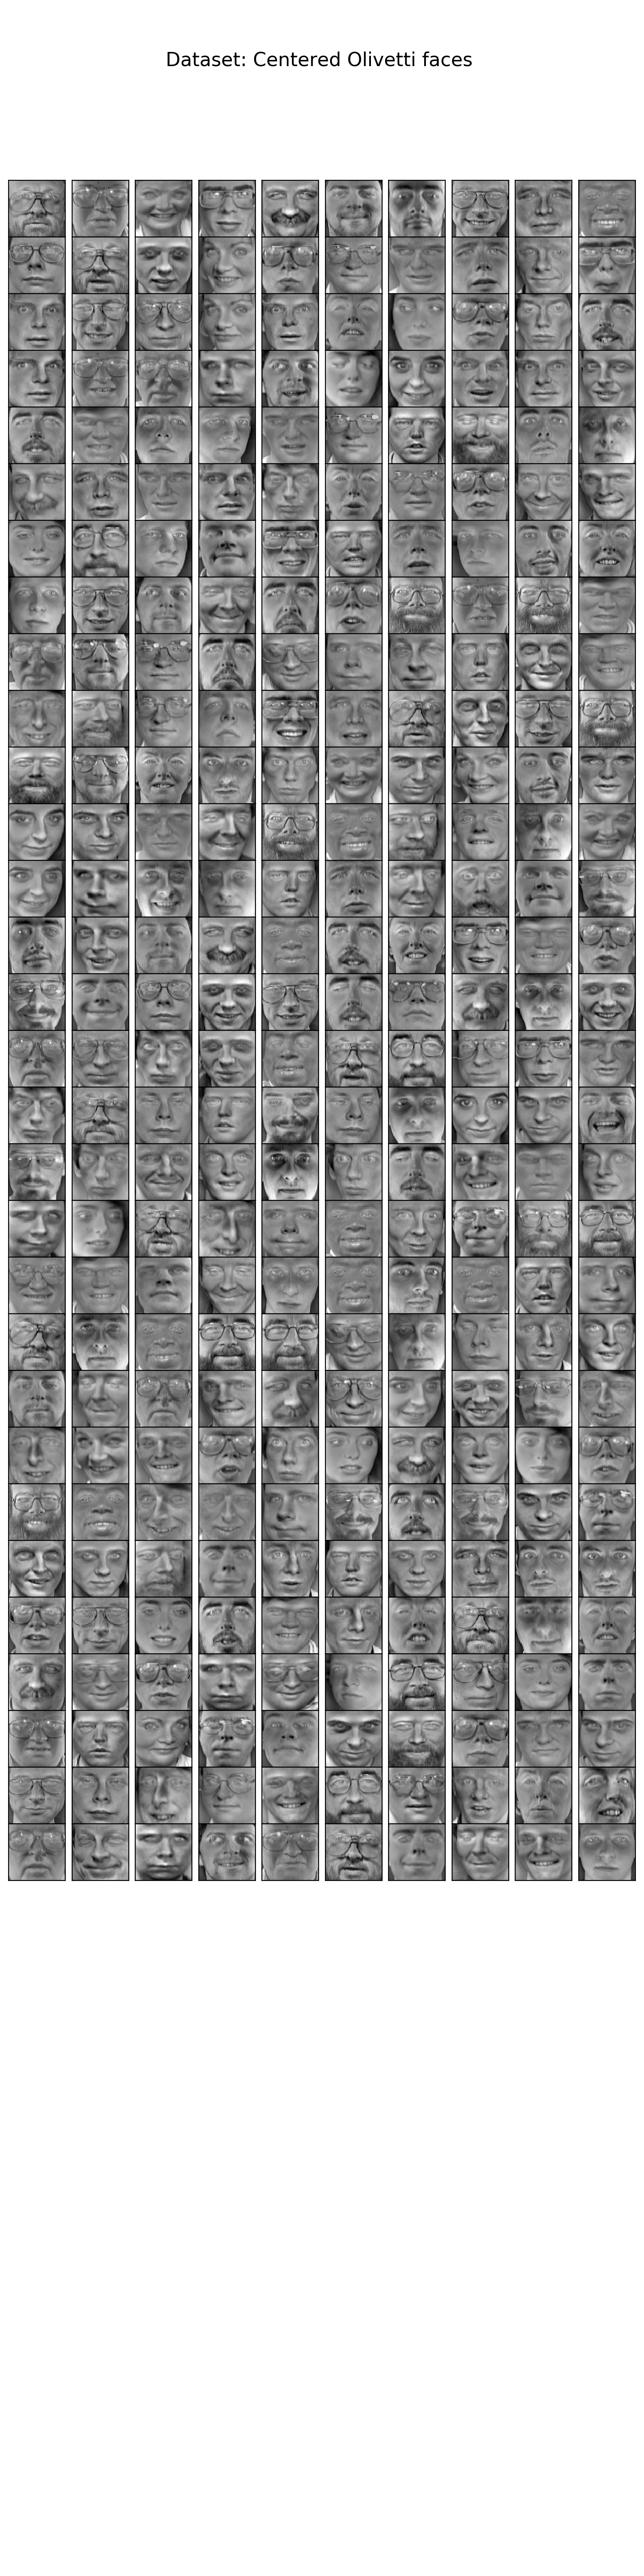

In [6]:
#n_row, n_col = 2, 3
n_row, n_col = 40, 10
n_train_samples = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data
n_samples, n_features = faces.shape

def centering(data):
    """
    Since most of the ML algorithms perform good for standardized dataset,
    This utility allows to center the dataset globally and locally
    """
    #global centering i.e. along columns i.e. we substract mean of each
    # column with elements along the axis 
    # in other words, we are getting mean of each samples
    data_centered = data - data.mean(axis=0)
    
    # local centering i.e. along row i.e. for each image, we shift it 
    # with mean along the row.
    data_centered -= data_centered.mean(axis=1).reshape(n_samples, -1) 

    return data_centered

###############################################################################

def plot_gallery(title, images, wtitle="", n_col=n_col, n_row=n_row, scale=3/4): 
    #plt.figure(figsize=(2. * n_col, 2.26 * n_row)) 
    #plt.figure(figsize=(1. * n_col, 1.26 * n_row))
    fig = plt.figure(figsize=(scale * n_col, scale * n_row)) 
    fig.canvas.set_window_title(wtitle)
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    

faces_centered = centering(faces)

###############################################################################
# Plot the input data
n_display_samples = int(n_train_samples*0.75)
plot_gallery(title="Dataset: Centered Olivetti faces ", images=faces_centered[:n_display_samples]) 
###############################################################################
plt.show()



#### $\color{orange}{\mathbf{EX.2.1.2}} \color{darkblue}{\mathbf{\text{ Model Training}}}$


Let's train Gaussian Mixture Models with 8 components and full covariance type. 
Using full covariance gives us more better model although it is somewhat slower.


In [7]:

# use full covariance for better model. Other good options is tied
covariance_type = "full" # full, tied, diag, spherical

# number of gaussian components
n_gaussians = 24

# instantiate GMM model
gmm = GaussianMixture(
        n_components = n_gaussians, 
        covariance_type=covariance_type,
        tol=1e-2,
        max_iter=300,
      )


t0 = time()
sampled_faces_centered = faces_centered[:n_train_samples]
gmm.fit(sampled_faces_centered)
t1 = time()

print("Model Training Took ", t1-t0, " seconds")


Model Training Took  212.94789695739746  seconds


#### $\color{orange}{\mathbf{EX.2.1.3}} \color{darkblue}{\mathbf{\text{ Generating New Data i.e. New Person Image}}}$


Let's train Gaussian Mixture Models with 8 components and full covariance type. 
Using full covariance gives us more better model although it is somewhat slower.


<IPython.core.display.Javascript object>


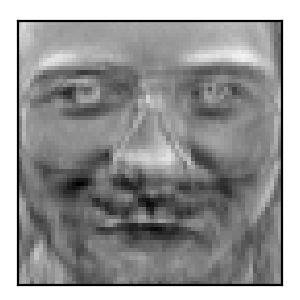

Model New Sample Creation Took  568.6313271522522  seconds


In [8]:

t0 = time()

new_faces= gmm.sample(1)

t1 = time()

plot_gallery(wtitle="Generated Olivetti faces", title="", images=new_faces[0], n_row=1, n_col=1, scale=1.5) 

plt.show()

print("Model New Sample Creation Took ", t1-t0, " seconds")


We can see the new generated face doesn't exists in the olivetti dataset. 


## $\color{orange}{\mathbf{EX.2.2}} \color{darkblue}{\mathbf{\text{ GMM for predicting Time Series (e.g Stocks, Signals etc).}}}$<a name="uc_ex_ts"></a>

Time Series modelling and prediction has many applications. Typically, one uses [Markov Chain](https://en.wikipedia.org/wiki/Markov_chain) for time series. However, Since GMM is so diverse, we can use it to model time series. 

We will be following the idea from this paper on [GMM for Time Series Modelling, Forecasting, and Interpolation](https://pdfs.semanticscholar.org/5a46/a53e2255d271b337f7a8271350a9cf6c7a02.pdf) by Eirola and Lendasse.

We will illustrate the concept and then deep dive into code. Note that we will use the toy dataset but the idea can be applied to other time series datasets like signals from equipments (radar, ecg), stock markets etc.



### $\color{orange}{\mathbf{EX.2.2.1}} \color{darkblue}{\mathbf{\text{ Mixture Model for Time Series: Transforming 1d Time Series to 2d Time SeriesDataset.}}}$

The core idea for modelling Time Series is  similar to Markov Chain (which has memory of last M states). We can do that, by preprocessing the data set in the sliding window manner of width M.

The above idea is illustrated in the following figure.

![Time Series Transformation](../doc/source/images/GMM/GMM_TS_txf.png)

Above can be achieved by following code:

In [9]:


def timeSeries_2_SlidingWindow_DataSet(np_y, dims):
    """
    Convert 1d time series dataset into 2d time series using sliding window techniques
    @args => 
        np_y: 1d numpy array of time series
        dims: width of the sliding window
    @return =>
        2d numpy array containing n-w samples and each row corresponds to dims data points
    """
    y = np_y.tolist()
    r = []
    for i in range(len(y)-dims):
        cy = y[i:i+dims]
        r.append(cy.tolist())
    return np.array(r)    
    

### $\color{orange}{\mathbf{EX.2.2.2}} \color{darkblue}{\mathbf{\text{ Training Time Series Model}}}$

Once we have re-formatted the data as explained in previous section, we can just instantiate GMM from scikit learn and
run the fit method to train our GMM model.

These can be achieved by following code.



In [10]:


def train_GMM_TS_Model(slidingWindow_ds, n_gaussians=16, covariance_type="full", max_iter=300, tol=1e-1):
    """
    @args =>
        slidingWindow_ds: transformed time series dataset as explained in previous section
    @return =>
        fitted GMM model
    """
    # instantiate GMM model with full 16 component with full variance
    gmm = GaussianMixture(
            n_components = n_gaussians, 
            covariance_type=covariance_type,
            max_iter=max_iter,
            tol=tol
          )
    
    gmm.fit(slidingWindow_ds)
    return gmm


### $\color{orange}{\mathbf{EX.2.2.3}} \color{darkblue}{\mathbf{\text{ Predicting Time Series.}}}$

Once we have trained GMM model. We can use it to predict short-to-medium term time series.
To understand the details, we recommend use to see [Section (2.2) of GMM of Time Series Paper](https://pdfs.semanticscholar.org/5a46/a53e2255d271b337f7a8271350a9cf6c7a02.pdf).

The core idea for prediction is as follows:

* Since GMM is mixture of Gaussians. Each Gaussian is characterized by its mean vector and covariance vector.
So we can split mean vector into given mean vector (i.e. past) and predicted mean vector (i.e. future).

* Similarly, we can split the rectangular covariance matrix into four component i.e. 
$\normalsize \color{darkred}{ \mathbb{cov(\color{teal}{past, past}), cov(\color{teal}{past}, \color{olive}{future)}, cov(\color{olive}{future}, \color{teal}{past}), cov(\color{olive}{future, future})}}$

* We can compute the future probability using conditional PDF for Multivariate Gaussain as [Conditional PDF from joint PDF ](AppliedMath.ipynb#prob_dist_mvn)


The above logic can be implemented by following code


In [11]:
def partition_stats(gmm, ts_seg, X):
    """
    Partition the mean and covariance matrix into past and future components
    @args =>
        gmm: fitted Gaussian Mixture Model
        ts_seg: original time series data
        X: transformed 2d time series data on which gmm was trained
    @return =>
        an array corresponding to each of the components in the gmm.
        Each array contains
            "mu_k_p" = past component of mean vector for kth comp
            "mu_k_f" = future component of mean vector for kth comp
            "cov_k_pp" = past and past component of cov matrix for kth comp
            "cov_k_pf" = past and future component of cov matrix for kth comp
            "cov_k_fp" = future and past component of cov matrix for kth comp
            "cov_k_ff" = future and future component of cov matrix for kth comp
    """
    ts_seg_dim = ts_seg.shape[0]
    fit_dim = self.X.shape[1]
    fut_dim = fit_dim - ts_seg_dim
        
    #DEBUG print(ts_seg_dim, fut_dim)
    mu = self.gmm.means_
    cov = self.gmm.covariances_
    part_stats = []
    for k in range(mu.shape[0]):
        mu_k = mu[k]
        cov_k = cov[k]
        mu_k_p = mu_k[:ts_seg_dim]
        mu_k_f = mu_k[ts_seg_dim:]
        cov_k_pp = cov_k[:ts_seg_dim,:ts_seg_dim]
        cov_k_pf = cov_k[:ts_seg_dim,ts_seg_dim:]
        cov_k_fp = cov_k[ts_seg_dim:,:ts_seg_dim]
        cov_k_ff = cov_k[ts_seg_dim:,ts_seg_dim:]
        stats = {}
        stats["mu_k_p"] = mu_k_p
        stats["mu_k_f"] = mu_k_f
        stats["cov_k_pp"] = cov_k_pp
        stats["cov_k_pf"] = cov_k_pf
        stats["cov_k_fp"] = cov_k_fp
        stats["cov_k_ff"] = cov_k_ff
        part_stats.append(stats)
            
    return part_stats    
           
def predict(gmm, ts_seg):
    """
    Predict using the GMM techniques outlines in paper
    @args =>
        gmm: fitted Gaussian Mixture Model
        ts_seg: transformed 2d time series data on which gmm was trained
    @return =>
        predicted values of the time series
    """
    
   
    part_stats = self.partition_stats(ts_seg)
       
    # compute the final probability as per section 2.2 of paper by Eirola on GMM for forecasting    
    # also see the section AppliedMath.ipynb#prob_dist_mvn in companion notebook
    ts_seg_f = []
    for k, stats in enumerate(part_stats):
        mu_k_p = stats["mu_k_p"]
        ts_seg_k_f = stats["mu_k_f"]
        cov_k_pp_inv = np.linalg.inv(stats["cov_k_pp"])
        cov_k_fp = stats["cov_k_fp"]
        ts_seg_shift = ts_seg - mu_k_p
        ts_seg_k_f += np.matmul(np.matmul(cov_k_fp, cov_k_pp_inv), ts_seg_shift)
        ts_seg_f.append(ts_seg_k_f)
            
    np_ts_seg_f = np.array(ts_seg_f)
        
    #mu_k_f = part_stats[0]["mu_k_f"]
    mu_k_f = np.full(shape=part_stats[0]["mu_k_f"].shape, fill_value=0)
    ts_seg_ext = np.hstack((ts_seg,mu_k_f))
    np_probas = self.gmm.predict_proba([ts_seg_ext])
    ts_seg_f = np.dot(np_ts_seg_f.T, np_probas.T)
    return ts_seg_f
       

### $\color{orange}{\mathbf{EX.2.2.4}} \color{darkblue}{\mathbf{\text{ Time Series Dataset.}}}$


Now we are ready to run our code but before we do it we would like to have some dataset. 
For this notebook, we will use toy dataset as generating by following function.


In [12]:
class TimeSeriesData(object):
    
    @classmethod
    def get_sine(cls, n=1000, pseudo_freq=2):
        """
        Generate the dataset for time series.
        This function also converts 1d ts to 2d ts and split it into train and test set.
        @args =>
            n: number of samples to generate.
            pseudo_freq: number of waves since unit doesn't match we call it pseudo_freq
        @return => (x, y)
            x: time series x co-ord
            y: time series y co-ord
        """

        x = np.linspace(0,pseudo_freq*2*np.pi, n)
        y = np.sin(x)
       
        return (x, y)    
    
    @classmethod
    def get_cosine(cls, n=1000, pseudo_freq=2):
        """
        Generate the dataset for time series.
        This function also converts 1d ts to 2d ts and split it into train and test set.
        @args =>
            n: number of samples to generate.
            pseudo_freq: number of waves since unit doesn't match we call it pseudo_freq
        @return => (x, y)
            x: time series x co-ord
            y: time series y co-ord
        """
        x = np.linspace(0,pseudo_freq*2*np.pi, n)
        y = np.cos(x)
       
        return (x, y)    
    
    @classmethod
    def get_sine_with_noise(cls, n=1000, pseudo_freq=2):
        """
        Generate the dataset for time series.
        This function also converts 1d ts to 2d ts and split it into train and test set.
        @args =>
            n: number of samples to generate.
            pseudo_freq: number of waves since unit doesn't match we call it pseudo_freq
        @return => (x, y)
            x: time series x co-ord
            y: time series y co-ord
        """
        x, y = cls.get_sine(n, pseudo_freq)
        
        n = np.zeros(shape=y.shape)
        # introduce a spike to have complicated data
        n[50] = 1
        y = y+n
        
        return (x, y)    
    
    @classmethod
    def get_random_wave(cls, n=1000):
        """
        Generate the dataset for time series.
        This function also converts 1d ts to 2d ts and split it into train and test set.
        @args =>
            n: number of samples to generate.
            pseudo_freq: number of waves since unit doesn't match we call it pseudo_freq
        @return => (x, y)
            x: time series x co-ord
            y: time series y co-ord
        """
        # using the idea of decomposition similar to fourier transform add 
        (x, y) = (np.zeros(n), np.zeros(n))
        for pseudo_freq in (1, 1.5, 2, 2.5, 3, 3.5):
            # note all the func call returns same x
            xi, yi = cls.get_sine(n, pseudo_freq)
            x = xi
            y = y + yi
            
            #xi, yi = cls.get_cosine(n, pseudo_freq)
            #x = xi
            #y = y + yi
        
        return (x, y)
    
        
    @classmethod
    def get_random_walk(cls, n=1000):
        # must create smooth version
        #TBD
        base = 100
        x = np.linspace(0,n, n)
        def random_step():
            step_size = 1.1
            rstep = None
            if np.random.uniform(0, 1, 1) < 0.5:
                rstep = -1*step_size 
            else:
                rstep = 1*step_size
            return rstep    
        
        random_walk = list()
        random_walk.append(base)
        for i in range(n-1):
            random_walk.append(random_walk[-1]+random_step())
       
        y = np.array(random_walk)
        return(x, y)
    
_test = False

if _test:
    #x,y = TimeSeriesData.get_cosine(n=1000, pseudo_freq=1) 
    #x,y = TimeSeriesData.get_random_wave() 
    x,y = TimeSeriesData.get_random_walk(n=100) 

    print(x.shape, y.shape)
    fig, ax = plt.subplots()

    plt.plot(x,y, label="time series data")
    plt.legend(loc='best')
    plt.show()
    
    

### $\color{orange}{\mathbf{EX.2.2.3}} \color{darkblue}{\mathbf{\text{ GMM Time Series Demo.}}}$

We have examined all the sub components of this code. Let's combine it together and we can get our code running


In [13]:
import numpy as np
from sklearn.mixture import GaussianMixture

import time

class TimeSeriesGaussianMixture(object):
    """
        Implement Time Series Modelling and Prediction Using GMM.
        Reference Paper is https://pdfs.semanticscholar.org/5a46/a53e2255d271b337f7a8271350a9cf6c7a02.pdf
    """
    def __init__(self, win_size,n_gaussians=16, *args, **kwargs):
        """
        @args =>
            self: instance of TimeSeriesGaussianMixture
            win_size: window size of the sliding window algorithm to convert 1d to 2d time series
            ts_x: x co-ord of time series
            ts_y: y co-ord of time series
            
        @fields=>
            ts: time series internal representation
            ts_dims: window size of the sliding window algorithm to convert 1d to 2d time series
            ts_x:x co-ord of time series
            ts_y:y co-ord of time series
            trained:boolean indicating if models were trained
            gmm:an instance of Gaussian Mixture Model scikit class
        """
        self.ts = np.array([])
        self.ts_dims = win_size
        self.ts_x = np.array([])
        self.ts_y = np.array([])
        self.trained = False
        self.X = np.array([[]]) # design matrix
        
        # number of gaussian component to use in mixture model is n_gaussians
        # covariance type to use: full is slow but gives better result
        covariance_type = "full"
       
        # Gaussian Mixture Model scikit class
        self.gmm = GaussianMixture(n_components = n_gaussians, 
                                           covariance_type=covariance_type,
                                           max_iter=300
                                          )
    def ts2X(self, np_y, dims):
        """
        Convert 1d time series dataset into 2d time series using sliding window techniques
        @args => 
            self: instance of TimeSeriesGaussianMixture
            np_y: 1d numpy array of time series
            dims: width of the sliding window
        @return =>
            2d numpy array containing n-w samples and each row corresponds to dims data points
        """
        y = np_y.tolist()
        r = []
        for i in range(len(y)-dims):
            cy = y[i:i+dims]
            r.append(cy)
        return np.array(r)    
    
    
    def fit(self, ts):
        """
        Fit Gaussian Mixture Model on 2d time series dataset.
        @args =>
            self: instance of TimeSeriesGaussianMixture
            ts:  time series data set
        """
        self.ts_y = ts
        X = self.ts2X(ts, self.ts_dims)
        self.X = X
        self.trained = True
        r = self.gmm.fit(X)
        print("Fitted Gaussian Mixture Model with convergence = ", self.gmm.converged_)
        return r

    def predict(self, ts_seg):
        """
        Predict using the GMM techniques outlines in paper
        @args =>
            self: instance of TimeSeriesGaussianMixture
            gmm: fitted Gaussian Mixture Model
            ts_seg: transformed 2d time series data on which gmm was trained
        @return =>
            predicted values of the time series

        """
        if not self.trained:
            print("model is not been trained")
            return
            
       
        part_stats = self._partition_stats(ts_seg)
        
        # Compute Eirola Paper's eqn 14
        ts_seg_f = []
        for k, stats in enumerate(part_stats):
            mu_k_p = stats["mu_k_p"]
            ts_seg_k_f = stats["mu_k_f"]
            cov_k_pp_inv = np.linalg.inv(stats["cov_k_pp"])
            cov_k_fp = stats["cov_k_fp"]
            ts_seg_shift = ts_seg - mu_k_p
            ts_seg_k_f += np.matmul(np.matmul(cov_k_fp, cov_k_pp_inv), ts_seg_shift)
            ts_seg_f.append(ts_seg_k_f)
            
        np_ts_seg_f = np.array(ts_seg_f)
        
        #mu_k_f = part_stats[0]["mu_k_f"]
        # Compute Eirola Paper's eqn 15
        mu_k_f = np.full(shape=part_stats[0]["mu_k_f"].shape, fill_value=0)
        ##Debug print("mu_k_f=",mu_k_f)
        ts_seg_ext = np.hstack((ts_seg,mu_k_f))
        ## Debug print("ts_seg_ext=", ts_seg_ext)
        np_probas = self.gmm.predict_proba([ts_seg_ext])
        ## Debug print("np_probas=", ts_seg_ext)
        ts_seg_f = np.dot(np_ts_seg_f.T, np_probas.T)
        ## Debug print("np_ts_seg_f=", np_ts_seg_f)
        ## Debug print("np_ts_seg_f.T=", np_ts_seg_f.T)
        ## Debug print("ts_seg_f=", ts_seg_f)
        return ts_seg_f
        
    def _partition_stats(self, ts_seg):
        """
        Partition the mean and covariance matrix into past and future components
        @args =>
            self: instance of TimeSeriesGaussianMixture
            gmm: fitted Gaussian Mixture Model
            ts_seg: original time series data
        @return =>
            an array corresponding to each of the components in the gmm.
            Each array contains factorization of mean and covariance matrix with keys as
                "mu_k_p" = past component of mean vector for kth comp
                "mu_k_f" = future component of mean vector for kth comp
                "cov_k_pp" = past and past component of cov matrix for kth comp
                "cov_k_pf" = past and future component of cov matrix for kth comp
                "cov_k_fp" = future and past component of cov matrix for kth comp
                "cov_k_ff" = future and future component of cov matrix for kth comp
        """
        ts_seg_dim = ts_seg.shape[0]
        fit_dim = self.X.shape[1]
        fut_dim = fit_dim - ts_seg_dim
        
        #DEBUG print(ts_seg_dim, fut_dim)
        mu = self.gmm.means_
        cov = self.gmm.covariances_
        part_stats = []
        for k in range(mu.shape[0]):
            mu_k = mu[k]
            cov_k = cov[k]
            mu_k_p = mu_k[:ts_seg_dim]
            mu_k_f = mu_k[ts_seg_dim:]
            cov_k_pp = cov_k[:ts_seg_dim,:ts_seg_dim]
            cov_k_pf = cov_k[:ts_seg_dim,ts_seg_dim:]
            cov_k_fp = cov_k[ts_seg_dim:,:ts_seg_dim]
            cov_k_ff = cov_k[ts_seg_dim:,ts_seg_dim:]
            stats = {}
            stats["mu_k_p"] = mu_k_p
            stats["mu_k_f"] = mu_k_f
            stats["cov_k_pp"] = cov_k_pp
            stats["cov_k_pf"] = cov_k_pf
            stats["cov_k_fp"] = cov_k_fp
            stats["cov_k_ff"] = cov_k_ff
            part_stats.append(stats)
            
        return part_stats    
   




We have all the code ready and we are ready to run it. Here is commented code for predicting time series dataset



In [14]:

# As explained in EX.2.2.1, we transform 1d time series into 2d 



# BEGIN dataset
num_samples = 500


# As explained in EX.2.2.1, we transform 1d time series into 2d 
win_size = int(0.1*num_samples)

# get toy samples from sine waves
x_points, points  = TimeSeriesData.get_sine_with_noise(n=num_samples)
x_points, points  = TimeSeriesData.get_random_wave(n=num_samples)
#x_points, points  = TimeSeriesData.get_random_walk(n=num_samples)
# split dataset into train:test in the ratio 80:20
# train samples
train_pct = 0.80
train_num_samples = int(train_pct*num_samples)
train = points[:train_num_samples]
x_train = x_points[:train_num_samples]

# test samples
test_num_samples = int(num_samples-train_num_samples)
test = points[-test_num_samples:] # take sample in the end for test
x_test = x_points[-test_num_samples:]


# As explained in EX.2.2.3, since sample size is win_size and we use part of it as our input
# we choose to have input i.e. past dim to be 60% of window size

# number of samples in 2d dataset used as input at testing time
past_dims = int(win_size*0.5) 
# number of dims or samples in 2d dataset that will be predicted by GMM model.
fut_dims = int(win_size - past_dims)

# END dataset

# BEGIN training

# instantiate GMM model
tsgmm_model = TimeSeriesGaussianMixture(win_size=win_size)

# train model
tsgmm_model.fit(train)

# END training


# BEGIN test

# transform test dataset into 2d representation as explained in EX.2.2.1
test_2d  = tsgmm_model.ts2X(test, tsgmm_model.ts_dims)
#print("test_2d = ", test_2d)
# Since as explained in EX.2.2.2, we give only past_dim as input to the model 
# and hence make a slice
test_query_points_2d = test_2d[:,:-fut_dims]

# We will have (num_test_samples-win_size) number of test points.
# We will run our prediction for 1 test points.
ts_past_points = test_query_points_2d[0]
ts_past_x_points = x_test[:past_dims]
#ps = ts_est.partition_stats(ts_seg)
#print(ps[0])
##print(ts_est.gmm.covariances_[0])

# make prediction , output will have fut_dims points
ts_future_points_tmp = tsgmm_model.predict(ts_past_points)
# post process to make output 1d
ts_future_points = ts_future_points_tmp.flatten()
ts_future_x_points =  x_test[past_dims:past_dims+fut_dims]

## DEBUG print("x_test", x_test.shape)
## DEBUG print("ts_past_points", ts_past_points.shape, ts_past_x_points.shape)
##DEBUG print("ts_future", ts_future_points.shape, ts_future_x_points.shape)
# END test


Fitted Gaussian Mixture Model with convergence =  True


<IPython.core.display.Javascript object>


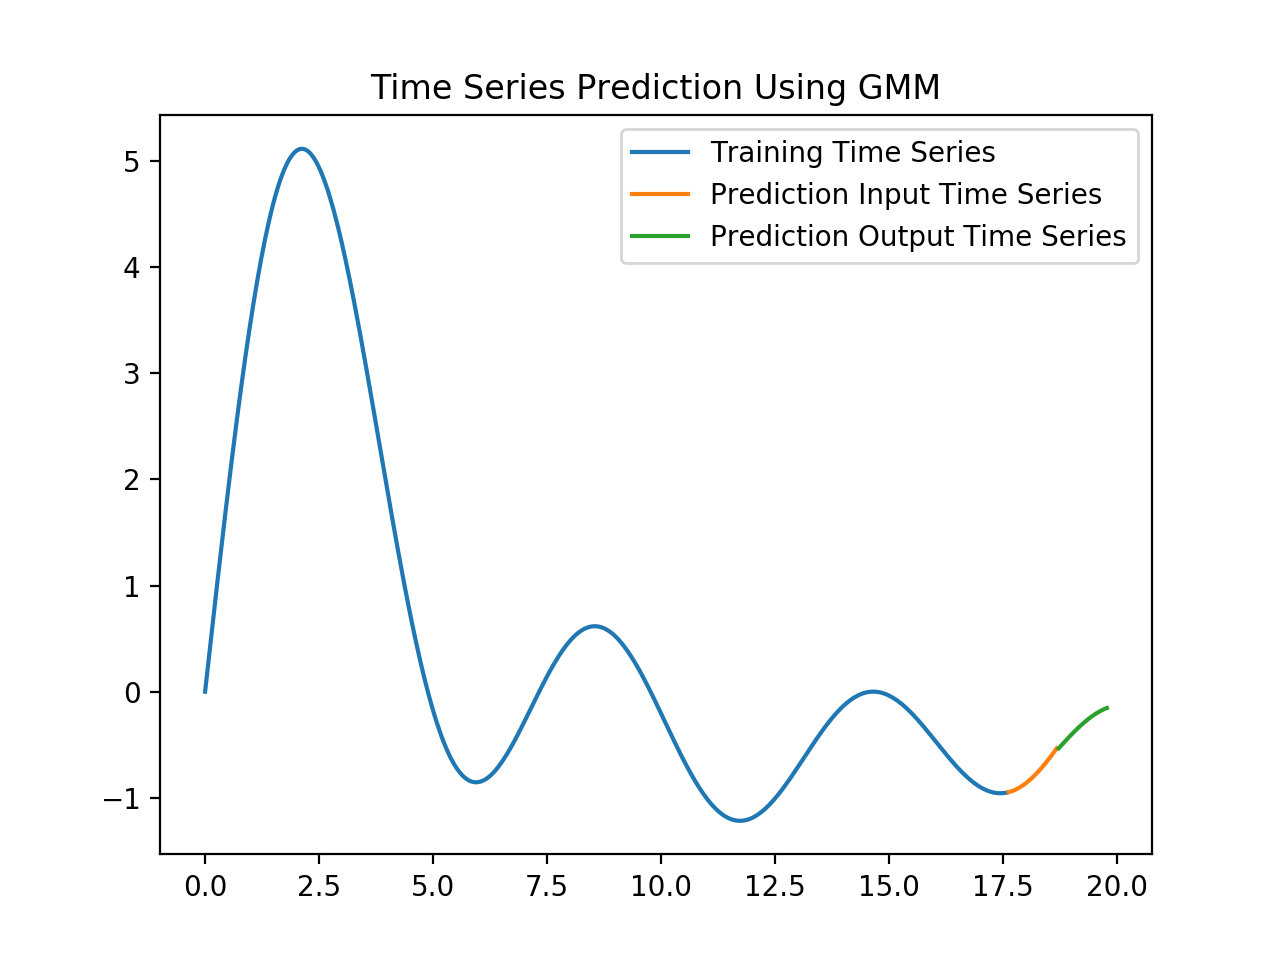

In [15]:

_debug = False

if _debug:
    print("ts_future_points=",ts_future_points)
    print("ts_past_points",ts_past_points)
    print("test_2d=", test_2d)
    print("test=", test)
    print("x_test=", x_test)
    print("x_test=", x_test)
    print("ts_past_points=",ts_past_points)
    
plt.title("Time Series Prediction Using GMM")
#plt.plot(x_points, points)
plt.plot(x_train, train, label="Training Time Series")
#plt.plot(x_test, test)
plt.plot(ts_past_x_points, ts_past_points, label="Prediction Input Time Series")
plt.plot(ts_future_x_points, ts_future_points, label="Prediction Output Time Series")
plt.legend(loc='upper right')
plt.show()


Observations:

* We compute all the observation at once instead of other techniques which compute only partial
* it is robust to noise
* can handle arbitrary shape unlike normal regression and other techniques.
* There are other techniques for time series analysis but this techniques has advance as mentioned.



## $\color{orange}{\mathbf{SM.}} \color{darkblue}{\mathbf{\text{ Summary.}}}$<a name="summary"></a>


Here is what we did, we got the intuition of GMM and using our intuition we derived, the mathematical model of Gaussian Mixture Model and Numerical techniques for find its parameters using EM algorithms. In the end, to consider two application.

* Generating  a new picture of a person, which we have not seen i.e. that person might not exists.

* GMM to predict time series by re-modelling input data set.
